<h1>---Importing Necessary Files---</h1>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

<hr>
<h1>---Making a DataFrame for the Dataset---</h1>

In [2]:
ukroadaccident = pd.read_csv('datasets\\uk_road_accident.csv')

<hr>
<h1>---Checking if the DataFrame is Working---</h1>

In [3]:
ukroadaccident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>---Cleaning the Inconsistencies on the Accident date---</h1>

In [4]:
ukroadaccident['Accident Date'] = ukroadaccident['Accident Date'].astype('str')
ukroadaccident['Accident Date'] = ukroadaccident['Accident Date'].str.strip()
ukroadaccident['Accident Date'] = ukroadaccident['Accident Date'].str.replace('/', '-')

<h1>---Coverting the Data Type of the Accident Date---</h1>

In [5]:
ukroadaccident['Accident Date'] = pd.to_datetime(ukroadaccident['Accident Date'], dayfirst=True, errors='coerce')

<h1>---Extracting New Columns from Accident Date---</h1>

In [6]:
ukroadaccident['Year'] = ukroadaccident['Accident Date'].dt.year
ukroadaccident['Month_Number'] = ukroadaccident['Accident Date'].dt.month
ukroadaccident['Month'] = ukroadaccident['Accident Date'].dt.month_name()
ukroadaccident['Day'] = ukroadaccident['Accident Date'].dt.day
ukroadaccident['DayofWeek'] = ukroadaccident['Accident Date'].dt.dayofweek  # Monday=0, Sunday=6

<hr>
<h1>---Checking for Null Values---</h1>

In [7]:
ukroadaccident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Year                           0
Month_Number                   0
Month                          0
Day                            0
DayofWeek                      0
dtype: int64

<h1>---Fixing the Null Values---</h1>

<h3>-Numerical Null Values-</h3>

In [8]:
ukroadaccident['Latitude'].mean()

np.float64(52.553865761110956)

In [9]:
ukroadaccident['Latitude'] = ukroadaccident['Latitude'].fillna(ukroadaccident['Latitude'].mean())

<p>---------------------------------------------</p>

In [10]:
ukroadaccident['Longitude'].mean()

np.float64(-1.431210368502073)

In [11]:
ukroadaccident['Longitude'] = ukroadaccident['Longitude'].fillna(ukroadaccident['Longitude'].mean())

<h3>-Categorical Null Values-</h3>

In [12]:
ukroadaccident['Road_Surface_Conditions'] = ukroadaccident['Road_Surface_Conditions'].fillna('unaccounted')

<p>---------------------------------------------</p>

In [13]:
ukroadaccident['Road_Type'] = ukroadaccident['Road_Type'].fillna('unaccounted')

<p>---------------------------------------------</p>

In [14]:
ukroadaccident['Urban_or_Rural_Area'].mode()

0    Urban
Name: Urban_or_Rural_Area, dtype: object

In [15]:
ukroadaccident['Urban_or_Rural_Area'] = ukroadaccident['Urban_or_Rural_Area'].fillna(ukroadaccident['Urban_or_Rural_Area'].mode()[0])

<p>---------------------------------------------</p>

In [16]:
ukroadaccident['Weather_Conditions'] = ukroadaccident['Weather_Conditions'].fillna('unaccounted')

<h1>---Checking if there are still Null Values---</h1>

In [17]:
ukroadaccident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month_Number               0
Month                      0
Day                        0
DayofWeek                  0
dtype: int64

<hr>
<h1>---Checking the Data Type---</h1>

In [18]:
ukroadaccident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

<h1>---Fixing the Data Type---</h1>

In [19]:
ukroadaccident['Index'] = ukroadaccident['Index'].astype('category') 
ukroadaccident['Accident_Severity'] = ukroadaccident['Accident_Severity'].astype('category')
ukroadaccident['Light_Conditions'] = ukroadaccident['Light_Conditions'].astype('category')
ukroadaccident['District Area'] = ukroadaccident['District Area'].astype('category')
ukroadaccident['Road_Surface_Conditions'] = ukroadaccident['Road_Surface_Conditions'].astype('category') 
ukroadaccident['Road_Type'] = ukroadaccident['Road_Type'].astype('category') 
ukroadaccident['Urban_or_Rural_Area'] = ukroadaccident['Urban_or_Rural_Area'].astype('category') 
ukroadaccident['Weather_Conditions'] = ukroadaccident['Weather_Conditions'].astype('category') 
ukroadaccident['Vehicle_Type'] = ukroadaccident['Vehicle_Type'].astype('category')
ukroadaccident['Month'] = ukroadaccident['Month'].astype('category')
ukroadaccident['Year'] = ukroadaccident['Year'].astype('category')

<h1>---Checking again---</h1>

In [20]:
ukroadaccident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<hr>
<h1>---20 Questions and Insights---</h1>
<hr>

<h1>~EDA~</h1>

<h1>1. What is the most usual vehicle type?</h1>

In [21]:
ukroadaccident['Vehicle_Type'].mode()

0    Car
Name: Vehicle_Type, dtype: category
Categories (16, object): ['Agricultural vehicle', 'Bus or coach (17 or more pass seats)', 'Car', 'Data missing or out of range', ..., 'Pedal cycle', 'Ridden horse', 'Taxi/Private hire car', 'Van / Goods 3.5 tonnes mgw or under']

<h2><strong>Insight: </strong> <i>According to the result, the most frequent/usual type of vehicle involve in accidents is car.</i></h2>

<hr>
<h1>2. What is the usual light condition during the accidents?</h1>

In [22]:
ukroadaccident['Light_Conditions'].mode()

0    Daylight
Name: Light_Conditions, dtype: category
Categories (5, object): ['Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight']

<h2> <strong>Insight: </strong> <i>The result shows that accidents are usually happening during daylight.</i> </h2>

<hr>
<h1>3. In terms of road surface conditions, what is the the most frequent?</h1>

In [23]:
ukroadaccident['Road_Surface_Conditions'].mode()

0    Dry
Name: Road_Surface_Conditions, dtype: category
Categories (6, object): ['Dry', 'Flood over 3cm. deep', 'Frost or ice', 'Snow', 'Wet or damp', 'unaccounted']

<h2> <strong>Insight: </strong> <i>Based on the result, dry road surface condition are prone to accidents.</i> </h2>

<hr>
<h1>4. How many number of vehicles are mostly being involved during accidents?</h1>

In [24]:
ukroadaccident['Number_of_Vehicles'].mode()

0    2
Name: Number_of_Vehicles, dtype: int64

<h2> <strong>Insight: </strong> <i>The result shows that two vehicles are mostly involved during road accidents.</i> </h2>

<hr>
<h1>5. What type of road does the accidents usually happen? </h1>

In [25]:
ukroadaccident['Road_Type'].mode()

0    Single carriageway
Name: Road_Type, dtype: category
Categories (6, object): ['Dual carriageway', 'One way street', 'Roundabout', 'Single carriageway', 'Slip road', 'unaccounted']

<h2> <strong>Insight: </strong> <i>According to the result, accidents usually happen on a single carriageway road.</i> </h2>

<h1>6. How many record of accidents per year?</h1>

In [26]:
ukroadaccident['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<h2> <strong>Insight 1: </strong><i>The accidents record is <strong>gradually decreasing year by year from 27.57% in 2019 to 21.84% in 2022.</strong></i> </h2>
<h2> <strong>Insight 2: </strong><i>The highest number of accidents is on 2019, followed by 2020 at 25.83%, followed by 2021 with 24.76%, then 2022 is the lowest at 21.84%.</i> </h2>

<h1>7. In terms of weather conditions, when does the least and most accidents record?</h1>

In [27]:
ukroadaccident['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h2> <strong>Insight 1: </strong> <i>Based on the result, the <strong>majority of incidents (79%) happen under fine weather with no high winds</strong> weather condition. So, even a fine weather is not safe from road accidents.</i> </h2>
<h2> <strong>Insight 2: </strong> <i>Raining without high winds condition accounts for 12%, which is the second most condition.</i> </h2>
<h2> <strong>Insight 3: </strong> <i>The other conditions are 2% to below 1% rate, and the <strong>lowest is snowy with high winds at 0.13%</strong>lowest is snowy with high winds at 0.13%</i> </h2>
<h2> <strong>Insight 4: </strong> <i>There is a small portion of incidents classified as “Other” or “Unaccounted” (4.7% combined) which indicates the records under unknown conditions.</i> </h2>

<h1>~Aggregation~</h1>

<h1>8. What is the total number of accidents per road type?</h1>

In [28]:
ukroadaccident.groupby('Road_Type').size()

Road_Type
Dual carriageway       99424
One way street         13559
Roundabout             43992
Single carriageway    492143
Slip road               7041
unaccounted             4520
dtype: int64

<h2> <strong>Insight 1: </strong> <i>Single carriageways had the highest record of incidents with <strong>74.55%</strong>, which means this type of road is accident-prone.</i> </h2>
<h2> <strong>Insight 2: </strong> <i>Dual carriageways is 15%, showing fewer incidents compared to single carriageways.</i> </h2>
<h2> <strong>Insight 2: </strong> <i>A very small portion of 0.7% is unaccounted, which is the lowest data but valuable still.</i> </h2>

<h1>9. What is the average of number of casualties involved in accidents by accident severity?</h1>

In [29]:
ukroadaccident.groupby('Accident_Severity')['Number_of_Casualties'].mean()

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

<h2> <strong>Insight: </strong> <i>The average of accident severity in terms of fatal is 1.903129 (highest), serious is 1.467280, and slight is 1.331402 (lowest).</i> </h2>

<h1>10. How do accident severities vary across different light conditions?</h1>

In [30]:
ukroadaccident.groupby(['Accident_Severity', 'Light_Conditions']).size().unstack()

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Accident_Severity,,,,,
Fatal,68,1860,45,1612,5076
Serious,794,19130,360,7174,60759
Slight,5622,108345,2138,28651,419045


<h2> <strong>Insight: </strong> <i>We can conclude that all the three types of accident severity happens the most during the daylight, while the three of them also happens the least during darkness - lights unlit. </i> </h2>

<h1>11. What is the distribution of accidents by road type and road surface condition?</h1>

In [31]:
ukroadaccident.groupby(['Road_Type', 'Road_Surface_Conditions']).size().unstack()

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,unaccounted
Road_Type,,,,,,
Dual carriageway,66205,302,2408,909,29533,67
One way street,10068,5,183,76,3195,32
Roundabout,30698,22,745,232,12209,86
Single carriageway,332698,672,14918,4585,138743,527
Slip road,4714,9,178,60,2074,6
unaccounted,3438,7,85,28,954,8


<h2> <strong>Insight: </strong> <i>The result shows that all of the road types had the same highest number of accidents in terms of road surface conditions which is dry, they also had the same least number of accidents which is flood over 3cm. deep (road surface condition). </i> </h2>

<h1>12. What type of area does accidents happen the most?</h1>

In [32]:
ukroadaccident.groupby('Urban_or_Rural_Area').size()

Urban_or_Rural_Area
Rural          238990
Unallocated        11
Urban          421678
dtype: int64

<h2> <strong>Insight 1: </strong> <i>According to the result, accidents usually happen at Urban areas with <strong>63.82%</strong>. On the other hand, Rural areas account for <strong>36%</strong>, still a significant portion.</i> </h2>
<h2> <strong>Insight 2: </strong> <i>The Rural accidents record somehow half of the records in Urban areas, both are significant because if we only look at one a time, both are large numbers.</i> </h2>

<h1>13. What month does accidents usually happens?</h1>

In [33]:
ukroadaccident.groupby('Month').size()

Month
April        51744
August       53913
December     51836
February     49491
January      52872
July         57445
June         56481
March        54086
May          56352
November     60424
October      59580
September    56455
dtype: int64

<h2> <strong>Insight 1: </strong> <i>The result shows that accidents usually happen during the month of November with <strong>9.15%</strong> and February (7.49%) has the lowest.</i> </h2>
<h2> <strong>Insight 2: </strong> <i>Most months are fairly close, around 7.5–8.7%, showing fairly consistent incident distribution across the year.</i> </h2>
<h2> <strong>Insight 3: </strong> <i>Summer months (June–August) account for roughly ~25% combined, indicating higher traffic or activity during that period.</i> </h2>
<h2> <strong>Insight 4: </strong> <i>The slight peaks in October(9.02%)–November(9.15%) could indicate weather changes, holidays, or increased traffic contributing to incidents.</i> </h2>

<h1>14. What is the distribution of accidents by accident severity and vehicle type?</h1>

In [34]:
ukroadaccident.groupby(['Accident_Severity','Vehicle_Type']).size().unstack()

Vehicle_Type,Agricultural vehicle,Bus or coach (17 or more pass seats),Car,Data missing or out of range,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Minibus (8 - 16 passenger seats),Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Van / Goods 3.5 tonnes mgw or under
Accident_Severity,,,,,,,,,,,,,,,,
Fatal,21,325,6577,0,216,67,29,189,95,105,339,70,6,0,155,467
Serious,282,3373,66461,0,2321,857,276,2031,1014,1014,3457,767,39,0,1771,4554
Slight,1644,22180,424954,6,14770,5172,1671,13049,6494,6537,21861,4800,152,4,11368,29139


<h2> <strong>Insight: </strong> <i>According to the result, car is the vehicle type that got the highest accident of all the three types of accident severity, while ridden horse has the least.</i> </h2>

<h1>~Correlation~</h1>

<h1>15. Is there a correlation between the number of casualties and number of vehicles?</h1>

In [35]:
ukroadaccident['Number_of_Casualties'].corr(ukroadaccident['Number_of_Vehicles'])

np.float64(0.2288888612692756)

<h2> <strong>Insight: </strong> <i>The result shows that number of casualties and number of vehicles has no correlation.</i> </h2>

<h1>16. Is there a correlation betweem latitude number of casualties?</h1>

In [36]:
ukroadaccident['Latitude'].corr(ukroadaccident['Number_of_Casualties'])

np.float64(0.032200686625906395)

<h2> <strong>Insight: </strong> <i>Based on the result, there is no correlation between laltitude and number of casualties.</i> </h2>

<h1>17. Is there a correlation between longitude and number of casualties?</h1>

In [37]:
ukroadaccident['Longitude'].corr(ukroadaccident['Number_of_Casualties'])

np.float64(-0.0404056457884545)

<h2> <strong>Insight: </strong> <i>The result shows that there is no correlation between longitude and number of casualties.</i> </h2>

<h1>18. Is there a significant difference between accident severity and number of vehicles?</h1>

In [38]:
ukroadaccident['Accident_Severity'].unique()

['Serious', 'Slight', 'Fatal']
Categories (3, object): ['Fatal', 'Serious', 'Slight']

In [39]:
vehiserious = ukroadaccident[ukroadaccident['Accident_Severity'] == 'Serious']['Number_of_Vehicles']
vehislight = ukroadaccident[ukroadaccident['Accident_Severity'] == 'Slight']['Number_of_Vehicles']
vehifatal = ukroadaccident[ukroadaccident['Accident_Severity'] == 'Fatal']['Number_of_Vehicles']

In [40]:
result, pvalue = f_oneway(vehiserious, vehislight, vehifatal)
pvalue

np.float64(0.0)

<h2> <strong>Insight: </strong> <i>The result shows that there is extremely significance between the accident severity and number of vehicles, it shows that they are very related to each other.</i> </h2>

<h1>19. Is there a significant difference between the area and number of casualties?</h1>

In [41]:
ukroadaccident['Urban_or_Rural_Area'].unique()

['Urban', 'Rural', 'Unallocated']
Categories (3, object): ['Rural', 'Unallocated', 'Urban']

In [42]:
urbancasualty = ukroadaccident[ukroadaccident['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties']
ruralcasualty = ukroadaccident[ukroadaccident['Urban_or_Rural_Area'] == 'Rural']['Number_of_Casualties']
unallocatedcasualty = ukroadaccident[ukroadaccident['Urban_or_Rural_Area'] == 'Unallocated']['Number_of_Casualties']

In [43]:
result, pvalue = f_oneway(urbancasualty, ruralcasualty, unallocatedcasualty)
pvalue

np.float64(0.0)

<h2> <strong>Insight: </strong> <i>According to the result, there is a significant difference between the areas and the number of casualties.</i> </h2>

<h1>20. Is there a significant difference between light conditions and latitude?</h1>

In [44]:
ukroadaccident['Light_Conditions'].unique()

['Darkness - lights lit', 'Daylight', 'Darkness - lighting unknown', 'Darkness - lights unlit', 'Darkness - no lighting']
Categories (5, object): ['Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight']

In [45]:
lighta = ukroadaccident[ukroadaccident['Light_Conditions'] == 'Darkness - lights lit']['Latitude']
lightb = ukroadaccident[ukroadaccident['Light_Conditions'] == 'Daylight']['Latitude']
lightc = ukroadaccident[ukroadaccident['Light_Conditions'] == 'Darkness - lighting unknown']['Latitude']
lightd = ukroadaccident[ukroadaccident['Light_Conditions'] == 'Darkness - lights unlit']['Latitude']
lighte = ukroadaccident[ukroadaccident['Light_Conditions'] == 'Darkness - no lighting']['Latitude']

In [46]:
result, pvalue = f_oneway(lighta, lightb, lightc, lightd, lighte)
pvalue

np.float64(1.224998791423201e-27)

<h2> <strong>Insight: </strong> <i>The result shows that the difference between light conditions and latitude is very significant, mean the light conditions has an extreme effect on the latitude.</i> </h2>

<hr>
<h1>---Additional Five Questions about Accident Date---</h1>

<h2>-UniVariate-</h2>

<h1>21. Which day of the week had the most accidents record?</h1>

In [47]:
ukroadaccident['DayofWeek'].value_counts()

DayofWeek
5    107178
2     99558
3     99511
4     97900
1     94550
6     89302
0     72680
Name: count, dtype: int64

<h2> <strong>Insight: </strong> <i>Based on the result, accidents mostly occurs on Saturday, and accidents happen the least during Mondays.</i> </h2>

<h2>-BiVariate-</h2>

<h1>22. What is the number of accidents per month in each year?</h1>

In [48]:
accidentpermonth = ukroadaccident.groupby(['Month', 'Year']).size()
accidentpermonth.unstack()

Year,2019,2020,2021,2022
Month,,,,
April,14125,13394,12715,11510
August,15044,13366,13415,12088
December,14708,13794,13709,9625
February,13253,14353,10950,10935
January,15355,14133,13417,9967
July,15862,14630,14300,12653
June,15528,14205,13936,12812
March,15049,13494,13202,12341
May,15833,14336,13811,12372


<h2> <strong>Insight 1: </strong> <i>Based on their percentage equivalence, <strong>November is consistenly the peak month of accidents</strong> across all four years with two consequtive above 9% rate (2021, and 2022). Hoevwer, October also has high percentage with three ratings of 9% and above but November slightly beats it in most years.</i></h2>
<h2> <strong>Insight 2: </strong> <i><strong>February has the lowest percentage</strong> of accidents especially 2021 at just <strong>6.7%.</strong> It suggests that road accidents tend to be more common in October, while February is generally a safer month.</i></h2>
<h2> <strong>Insight 3: </strong> <i>Most of the months had high road accident rate on the year 2019, and we could see from the numbers that on the years 2020-2022, the number had decreased and we can conclude that this is  perhaps because of the pandemic.</i> </h2>

<h1>23. What is the state of accident severity across years?</h1>

In [49]:
ukroadaccident.groupby(['Accident_Severity', 'Year']).size().unstack()

Year,2019,2020,2021,2022
Accident_Severity,,,,
Fatal,2714,2341,2057,1549
Serious,24322,23121,21997,18777
Slight,155079,145129,139500,124093


<h2> <strong>Insight 1: </strong> <i>From the number itself, it shows that deadly crashes are rare compared to other types of accident severity. <strong>Fatal accidents are only around 1% of all cases.</strong> They even decreased slightly over the years, from 1.49% in 2019 down to 1.07% in 2022.</i></h2>
<h2> <strong>Insight 2: </strong> <i>On the other hand, <strong>slight accidents had the highest consistent record at around 85% every year</strong>.</i> </h2>
<h2> <strong>Insight 3: </strong> <i><strong>Seious accidents</strong> are in the middle of the percentage, <strong>staying between 13–14%</strong>.</i></h2>
<h2> <strong>Insight 4: </strong> <i>Accidents across the years were slight and less harmful, a small portion are serious, and very few cases are fatal.</i></h2>

<h2>-MultiVariate-</h2>

<h1>24. What is the average casualties per month, year, and road surface conditions?</h1>

In [50]:
ukroadaccident.groupby(['Month', 'Year', 'Road_Surface_Conditions'])['Number_of_Casualties'].mean().unstack()

Road_Surface_Conditions       Dry  Flood over 3cm. deep  Frost or ice  \
Month     Year                                                          
April     2019           1.360358              1.000000      1.200000   
          2020           1.339197              1.538462      1.560606   
          2021           1.353704              1.000000      1.000000   
          2022           1.357578              1.000000      1.500000   
August    2019           1.383017              1.636364      1.000000   
          2020           1.375027              1.578947      1.000000   
          2021           1.385929              2.090909           NaN   
          2022           1.379569              1.750000      1.500000   
December  2019           1.286649              1.531915      1.350850   
          2020           1.335708              1.708333      1.345857   
          2021           1.274566              1.500000      1.380342   
          2022           1.297656              1.600000      1.385561   
February  2019           1.315298              1.083333      1.287305   
          2020           1.318313              1.600000      1.346648   
          2021           1.326901              1.176471      1.364519   
          2022           1.325941              1.714286      1.317593   
January   2019           1.301965              1.358974      1.331887   
          2020           1.305425              1.515625      1.308008   
          2021           1.331680              1.333333      1.315061   
          2022           1.285207              1.111111      1.336806   
July      2019           1.342417              1.538462      1.000000   
          2020           1.324689              1.583333      1.000000   
          2021           1.340411              1.444444      1.000000   
          2022           1.339222              1.750000      1.000000   
June      2019           1.336180              1.506667      1.000000   
          2020           1.333754              1.166667      1.000000   
          2021           1.329111              1.555556           NaN   
          2022           1.339122              2.000000      1.000000   
March     2019           1.330359              1.294118      1.231579   
          2020           1.333562              1.352941      1.452555   
          2021           1.334661              1.200000      1.346939   
          2022           1.325219              1.333333      1.246914   
May       2019           1.346532              1.684211      1.000000   
          2020           1.337205              1.400000      1.500000   
          2021           1.354493              1.666667      1.500000   
          2022           1.338688              1.250000      1.333333   
November  2019           1.290865              1.260870      1.369295   
          2020           1.300952              1.583333      1.434132   
          2021           1.294445              1.452381      1.243243   
          2022           1.318023              1.444444      1.356423   
October   2019           1.330498              1.272727      1.400000   
          2020           1.314318              1.518519      1.347150   
          2021           1.324756              1.533333      2.200000   
          2022           1.336587              1.705882      1.188679   
September 2019           1.339429              1.250000      1.000000   
          2020           1.323790              1.509804      1.000000   
          2021           1.328964              2.111111           NaN   
          2022           1.332019              1.400000      1.000000   

Road_Surface_Conditions      Snow  Wet or damp  unaccounted  
Month     Year                                               
April     2019                NaN     1.385888     1.000000  
          2020           1.442308     1.442780     1.000000  
          2021           2.000000     1.420137     1.181818  
          2022           1.250000     1

<h2> <strong>Insight 1: </strong> <i>The <strong>average casualties are slightly higher on wet/damp roads (around 1.40–1.47)</strong> compared to dry roads (around 1.30–1.36) across almost months and years.</i> </h2>
<h2> <strong>Insight 2: </strong> <i>The <strong>"Flood over 3cm deep" condition</strong> often shows averages <strong>above 1.5 and sometimes above 2.0</strong> casualties per accident.</i> </h2>
<h2> <strong></strong> <i>Averages of <strong>frost/ice and snow condition varies</strong>frost/ice and snow condition varies a lot, both of them has usually around <strong>1.0</strong> average but there are times that it spikes to above <strong>2.0</strong> (October 2021 has the highest value with 2.2).</i> </h2>
<h2> <strong>Insight 4: </strong> <i>Most accidents happen on dry roads but accidents on wet and flooded roads are a bit more dangerous. Snow and ice road surface condition tend to happen less frequent but it is the most dangerous and causes more casualties when they do happen.</i> </h2>

<h1>25. What is the distribution of accidents by year, month, and rural/urban area?</h1>

In [51]:
ukroadaccident.groupby(['Urban_or_Rural_Area','Year', 'Month']).size().unstack()

Month                     April  August  December  February  January  July  \
Urban_or_Rural_Area Year                                                     
Rural               2019   5169    6001      5499      4874     5807  6047   
                    2020   4752    5204      5167      5226     5182  5415   
                    2021   4555    5256      5106      4144     4925  5277   
                    2022   3956    4537      3589      3896     3626  4476   
Unallocated         2019      0       0         2         0        1     1   
                    2020      1       0         1         0        0     0   
                    2021      0       0         0         0        0     0   
                    2022      0       0         0         0        0     0   
Urban               2019   8956    9043      9207      8379     9547  9814   
                    2020   8641    8162      8626      9127     8951  9215   
                    2021   8160    8159      8603      6806     8492  9023   
                    2022   7554    7551      6036      7039     6341  8177   

Month                     June  March    May  November  October  September  
Urban_or_Rural_Area Year                                                    
Rural               2019  5835   5350   5802      5974     5518       5682  
                    2020  5105   4947   5184      5251     5415       5143  
                    2021  4943   4391   4873      5456     5260       4830  
                    2022  4317   4118   4266      4671     4593       4380  
Unallocated         2019     1      0      0         0        0          0  
                    2020     1      1      2         0        0          0  
                    2021     0      0      0         0        0          0  
                    2022     0      0      0         0        0          0  
Urban               2019  9692   9699  10031     10585    10010       9589  
                    2020  9099   8546   9150      9519    10269       9289  
                    2021  8993   8811   8938     10017     9574       8962  
                    2022  8495   8223   8106      8951     8941       8580

<h2> <strong>Insight 1: </strong> <i>In all months and years, accidents mostly happens in <strong>urban areas at 76%-80%.</strong> While accidents in <strong>rural areas are lower with 19%-23%.</strong></i></h2>
<h2> <strong>Insight 2: </strong> <i>The highest percentage in <strong>urban areas</strong> was in <strong>November 2021 at 80.16%</strong>, followed by both September 2021 and October 2020 at 80.15%. While the <strong>lowest was April 2019 (76.56%).</strong></i></h2>
<h2> <strong>Insight 3: </strong> <i>In <strong>rural areas</strong>, the lowest percentage was <strong>19.84%</strong> on November 2021, while the highest was on April 2019 at <strong>23.44%.</strong></i></h2>
<h2> <strong>Insight 4: </strong> <i>Most accidents happen in urban areas (cities) regardless of the month and year. Rural accidents are fewer but the still have a peak month (April).</i></h2>

<h1>---Additional questions with matplotlib---</h1>

In [52]:
import matplotlib.pyplot as plt

In [53]:
ukroadaccident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<h1>26. What is the accident distribution by severity at Birmingham (highest accident record district area)?</h1>

In [54]:
birmingham = ukroadaccident[ukroadaccident['District Area'] == 'Birmingham']
accidentbirmingham = birmingham.groupby(['Accident_Severity', 'Light_Conditions']).size()
accidentbirmingham

Accident_Severity  Light_Conditions           
Fatal              Darkness - lighting unknown       2
                   Darkness - lights lit            47
                   Darkness - lights unlit           3
                   Darkness - no lighting            0
                   Daylight                         53
Serious            Darkness - lighting unknown       2
                   Darkness - lights lit           483
                   Darkness - lights unlit           3
                   Darkness - no lighting            6
                   Daylight                        980
Slight             Darkness - lighting unknown      78
                   Darkness - lights lit          3142
                   Darkness - lights unlit          45
                   Darkness - no lighting           13
                   Daylight                       8634
dtype: int64

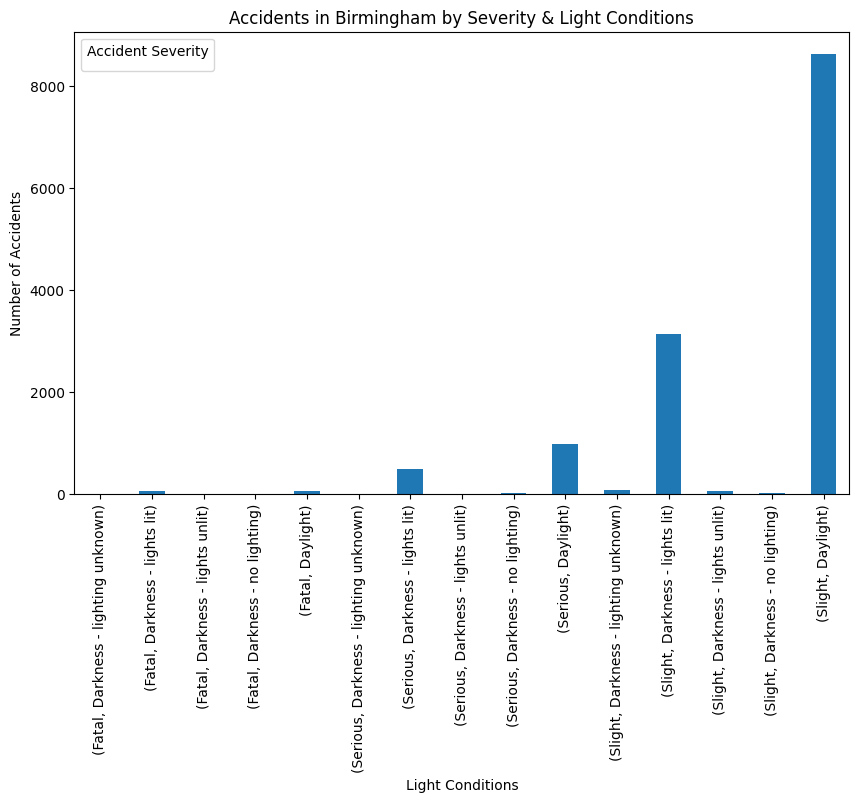

In [55]:
accidentbirmingham.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Accidents in Birmingham by Severity & Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.show()

<h2><strong>Insight: </strong> <i>The illustration shows that most <strong>slight</strong> severity accidents happen during <strong>daylight in Birmingham.</strong> Followed by slight accidents in darkness- light lit. Lastly, there's a small portion of serious accidents during daylight.</i> </h2>

<h1>27. What is the car accident distribution by severity per year and month?</h1>

In [56]:
car = ukroadaccident[ukroadaccident['Vehicle_Type'] == 'Car']
grouped = car.groupby(['Year', 'Accident_Severity']).size().reset_index(name='Count')
grouped.columns = ['Year', 'Accident_Severity', 'Count']
grouped

,Year,Accident_Severity,Count
0,2019,Fatal,1948
1,2019,Serious,17469
2,2019,Slight,110887
3,2020,Fatal,1772
4,2020,Serious,17384
5,2020,Slight,108738
6,2021,Fatal,1616
7,2021,Serious,17143
8,2021,Slight,109267
9,2022,Fatal,1241


In [57]:
pivoted = grouped.pivot(index='Year', columns='Accident_Severity', values='Count')

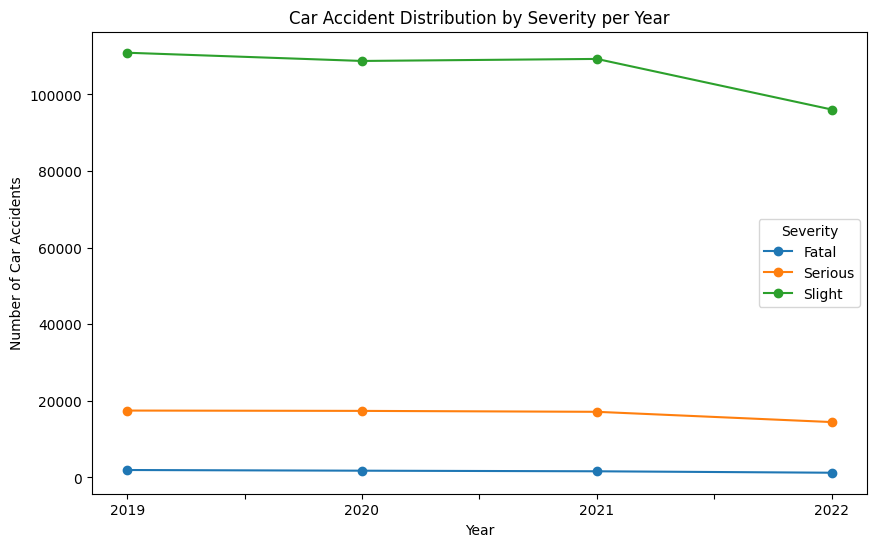

In [58]:
pivoted.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Car Accident Distribution by Severity per Year")
plt.xlabel("Year")
plt.ylabel("Number of Car Accidents")
plt.legend(title="Severity")
plt.show()

<h2> <strong>Insight: </strong> <i>As we can see from the line graph, there is a huge gap between slight severity and the other two severities. Fatality rate is the lowest of them all. Serious car accidents are around 15,000 number of accidents. While slight severity car accidents are on the top with above 100k records across 2019-2021, and it dropped a bit in 2022.</i></h2>

<h1>28. What is the accident distribution by road surface conditions per areas (rural, urban)? </h1>

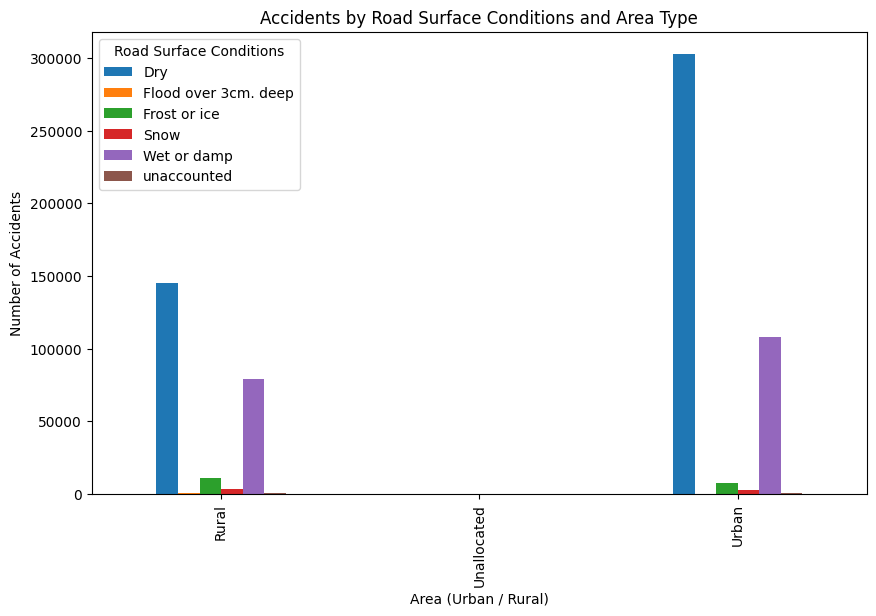

In [59]:
surfacearea = ukroadaccident.groupby(['Urban_or_Rural_Area', 'Road_Surface_Conditions']).size().unstack()
surfacearea.plot(kind='bar', figsize=(10,6))
plt.title("Accidents by Road Surface Conditions and Area Type")
plt.ylabel("Number of Accidents")
plt.xlabel("Area (Urban / Rural)")
plt.legend(title="Road Surface Conditions")
plt.show()

<h2> <strong>Insight: </strong> <i>Both rural and urban have both types of condition rate in terms of road surface. However, Urban got the highest number of accidents on dry or wet/damp surface conditions and on the other hand, Rural is much higher in terms of number of accidents on frost/ice and snow condition.</i></h2>

<h1>29. Comparing the weather condtions among the three highest disctrict areas and lowest area.</h1>

In [60]:
ukroadaccident['District Area'].value_counts().head(3)

District Area
Birmingham    13491
Leeds          8898
Manchester     6720
Name: count, dtype: int64

In [61]:
ukroadaccident['District Area'].value_counts().tail(1)

District Area
Clackmannanshire    91
Name: count, dtype: int64

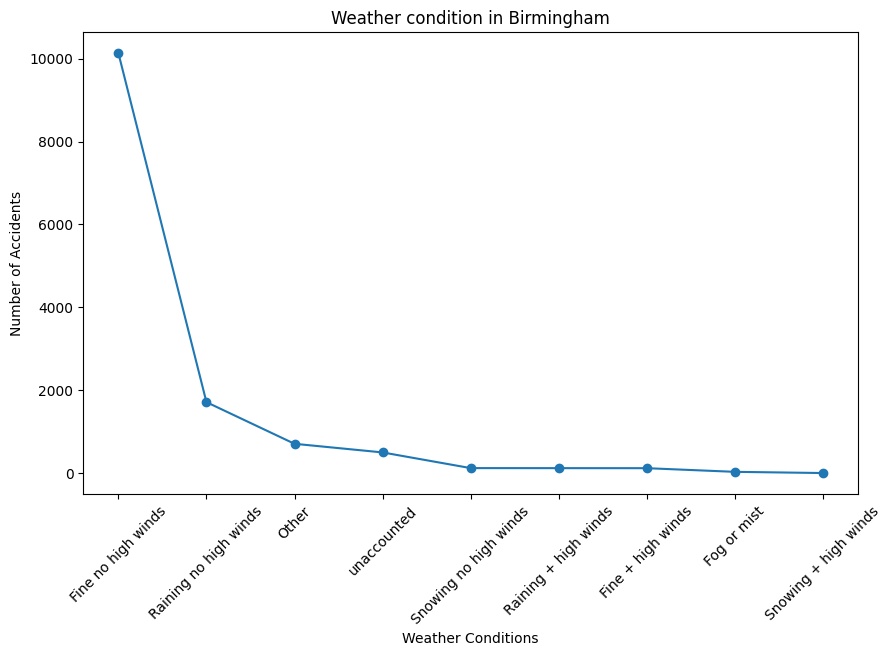

In [62]:
weatherbirmingham = ukroadaccident[ukroadaccident['District Area'] == 'Birmingham']
birmiweather = weatherbirmingham['Weather_Conditions'].value_counts()
birmiweather.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Weather condition in Birmingham")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

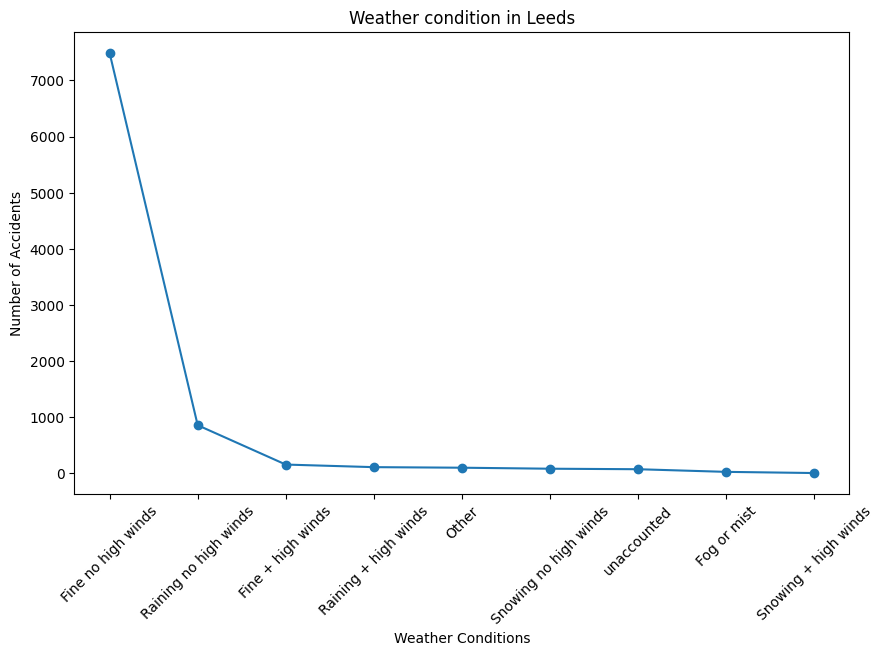

In [63]:
weatherleeds = ukroadaccident[ukroadaccident['District Area'] == 'Leeds']
leedsweather = weatherleeds['Weather_Conditions'].value_counts()
leedsweather.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Weather condition in Leeds")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

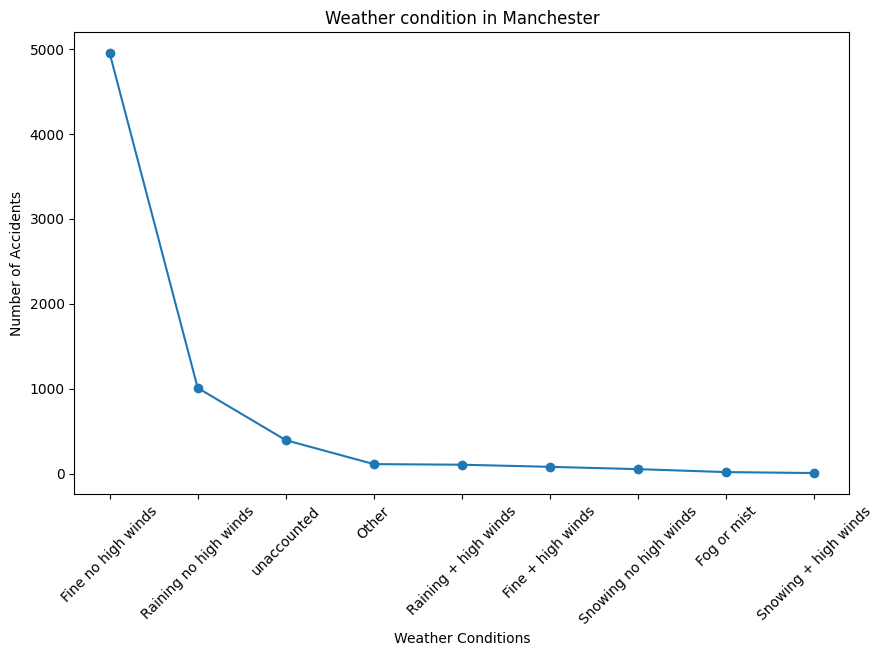

In [64]:
weathermanchester = ukroadaccident[ukroadaccident['District Area'] == 'Manchester']
manchesterweather = weathermanchester['Weather_Conditions'].value_counts()
manchesterweather.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Weather condition in Manchester")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

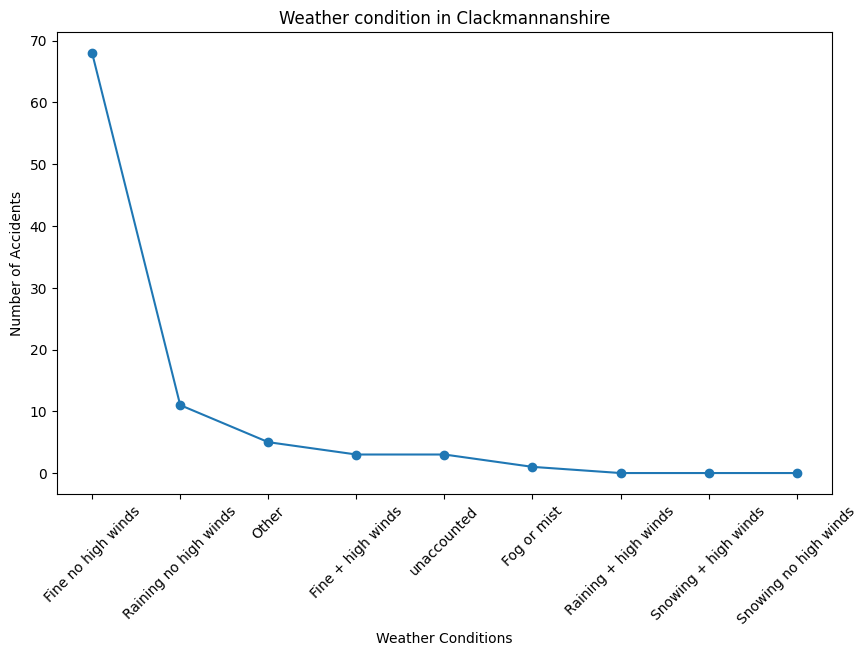

In [65]:
weatherclack = ukroadaccident[ukroadaccident['District Area'] == 'Clackmannanshire']
clackweather = weatherclack['Weather_Conditions'].value_counts()
clackweather.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Weather condition in Clackmannanshire")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h2> <strong>Insight 1: </strong> <i>It looks like there isnt much difference but if we really analyze it we can see their difference.</i></h2>
<h2> <strong>Insight 2: </strong> <i>First, all four districts has the same type of weather condtion (free no high winds) as the highest number of incidents(regardless of the total number of incidents per district) , and "snowy without winds" is the lowest.</i></h2>
<h2> <strong>Insight 3: </strong> <i>Raining without high winds is the second most condition among the four districts too.</i></h2>
<h2> <strong>Insight 4: </strong> <i>From the third to eighth conditions across all charts now varies.</i></h2>

In [66]:
#look for the data without the the outlier(fine no high winds) in all four district above.

<hr>
<h1>---SIX DISTRICT AREA ANALYSIS COMPARED TO NATIONAL TRENDS---</h1>

In [67]:
import folium
from folium.plugins import HeatMap

<h1>-National Analysis-</h1>

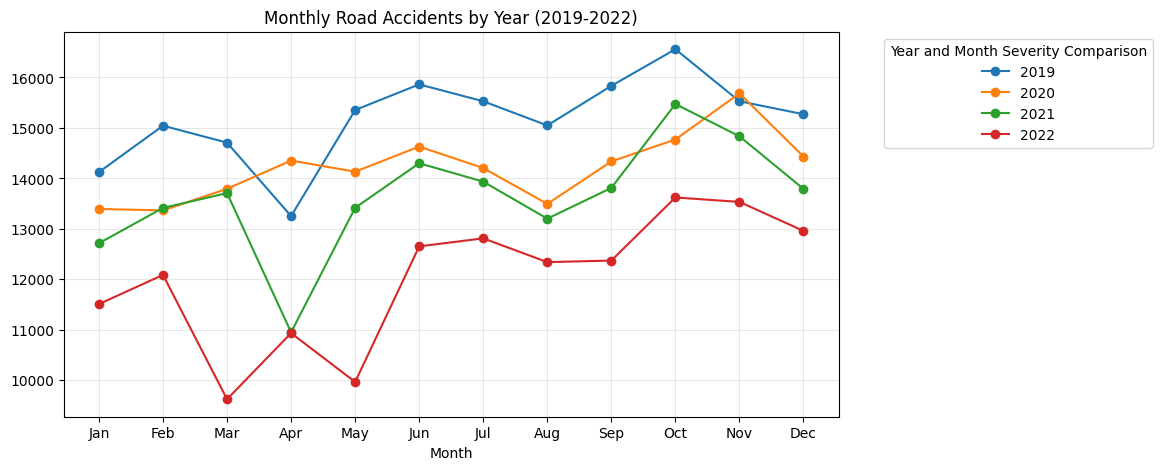

In [68]:
import matplotlib.pyplot as plt

# 1. Group by Year FIRST, then Month (critical order!)
monthly_data = ukroadaccident.groupby(['Year', 'Month']).size()

# 2. Unstack Year to create separate lines for each year
monthly_data = monthly_data.unstack(level=0)

# 3. Plot with clean formatting (only 4 lines!)
monthly_data.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h1>-National Seasonal Analysis-</h1>

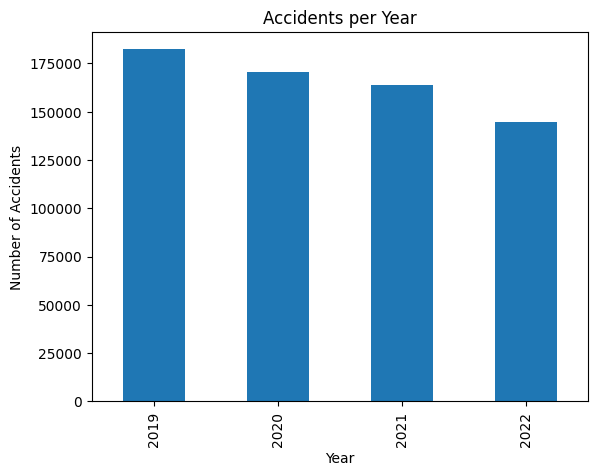

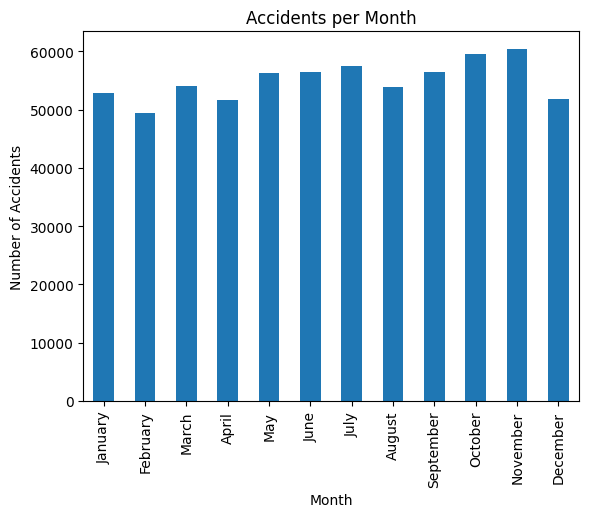

DayofWeek
Monday        72680
Tuesday       94550
Wednesday     99558
Thursday      99511
Friday        97900
Saturday     107178
Sunday        89302
Name: count, dtype: int64


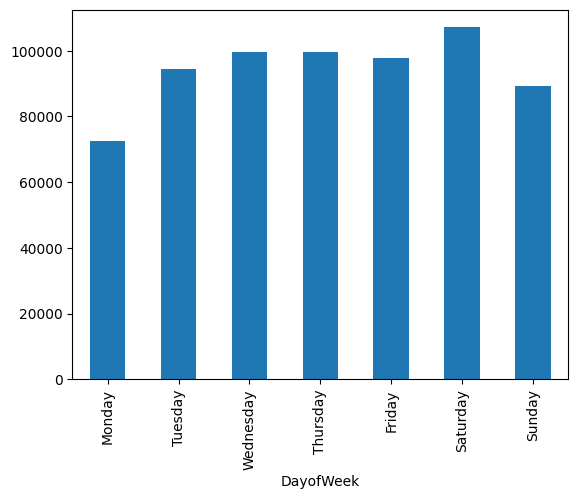

In [69]:
# Accidents per year
accidents_per_year = ukroadaccident['Year'].value_counts().sort_index()
accidents_per_month = ukroadaccident['Month_Number'].value_counts().sort_index()
accidents_per_day = ukroadaccident['DayofWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.astype(int).map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1>Accident Severity</h1>

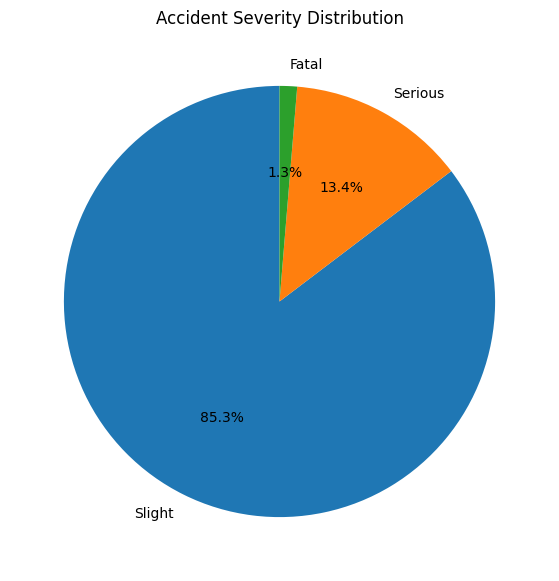

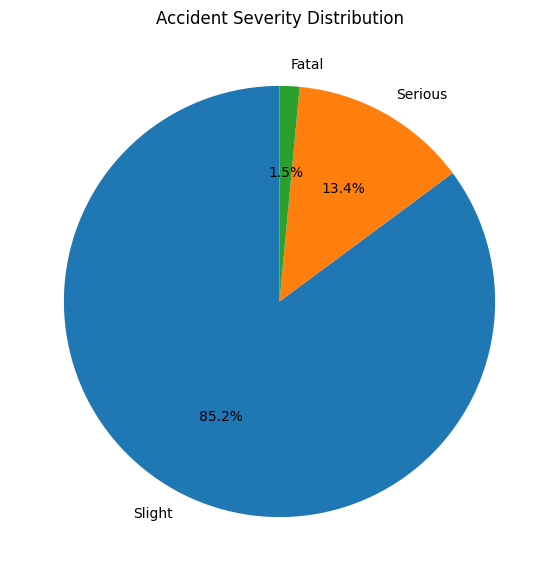

In [70]:
severity_counts = ukroadaccident['Accident_Severity'].value_counts()

plt.pie(severity_counts,
        labels = severity_counts.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019 = ukroadaccident[ukroadaccident['Year'] == 2019]
# severity_2019
sc_2019 = severity_2019['Accident_Severity'].value_counts()

plt.pie(sc_2019,
        labels = sc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


In [ ]:
ukmap = folium.Map(location=[54, -2], zoom_start=6)

for idx, row in ukroadaccident.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(ukmap)

ukmap.save('Accident_map.html')

In [ ]:
ukroadaccident['District Area'].unique()

<hr>
<h1>Using District Area to make a comparison to a general result </h1>
<h3>1. Aberdeen City Analysis</h3>

In [ ]:
aberdeen_df = ukroadaccident[ukroadaccident['District Area'] == 'Aberdeen City']

In [ ]:
monthly_aberdeendata = aberdeen_df.groupby(['Year', 'Month']).size()

monthly_aberdeendata = monthly_aberdeendata.unstack(level=0)

monthly_aberdeendata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Aberdeen City by Year (2019-2022)'
)
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2> <strong> <i>Insight 1: </i> </strong> On the national analytics, there is a noticeable spike in November 2019. However in Aberdeen City, there was a peak in February 2020. The lowest point on the national record was in December 2022, while in Aberdeen City there was a consistent zero record of all months on 2022. Overall, the national record is generally decreasing by year, but in the Aberdeen City it is quite unstable by year.</h2>

In [ ]:
# Accidents per year
accidents_per_year = aberdeen_df['Year'].value_counts().sort_index()
accidents_per_month = aberdeen_df['Month_Number'].value_counts().sort_index()
accidents_per_day = aberdeen_df['DayofWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h2> <strong> <i>Insight 2: </i> </strong>In terms of Year, the sequence of the national records is 2019 -being the highest- to 2020 to 2021 and to 2022 (lowest). While, in Aberdeen City, they got 2020 with the higest record to 2021 to 2019 and to 2020 with zero record.</h2>

<h2> <strong> <i>Insight 3: </i> </strong>In terms of Month, accidents usually happen on November with almost 60,000 records, while February is the least month with almost 50,000 records (national record). On the other hand, road accidents in the Aberdeen City usually happen on the month of May with above 120 records, while the least accidents is on the month of April with 90 records.</h2>

<h2> <strong> <i>Insight 4: </i> </strong>In terms of Day of the Week, Saturday is the day with highest records (above 100,000) while Monday is the lowest (around 70,000). While in Aberdeen City, accidents usually happen during Wednesday (around 200), and the least is on Monday (125 records). Though most of the weekdays have the most records. </h2>

<h1>Accident Severity in Aberdeen City</h1>

In [ ]:
severity_aberdeen  = aberdeen_df['Accident_Severity'].value_counts()

plt.pie(severity_aberdeen,
        labels = severity_aberdeen.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_aberdeen = aberdeen_df[aberdeen_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_aberdeen['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h2> <strong> <i>Insight 5: </i> </strong> Both records of the National and the Aberdeen City is almost the same with slight severity being the highest and serious severity being the second, and the lowest is the 'fatal'. </h2>

In [ ]:
aber = list(zip(aderdeen_df['Latitude'], aberdeen_df['Longitude']))
m = folium.Map(location=[aderdeen_df['Latitude'].mean(), aderdeen_df['Longitude'].mean()], zoom_start=10)

HeatMap(aber).add_to(m)
m.save('Aberdeen_heatmap.html')
m

<hr>
<h1>Wyre Analysis</h1>

In [ ]:
ukroadaccident['District Area'].unique()

In [ ]:
wyre_df = ukroadaccident[ukroadaccident['District Area'] == 'Wyre']

In [ ]:
monthly_wyredata = wyre_df.groupby(['Year', 'Month']).size()

monthly_wyredata = monthly_wyredata.unstack(level=0)

monthly_wyredata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Wyre by Year (2019-2022)'
)
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2> <strong> <i>Insight 1: </i> </strong> Compared to the national analytics, Wyre had its peak in August 2021, and the lowest point in December 2022. The distribution of accidents by year and month is quite unstable in Wyre.</h2>

In [ ]:
# Accidents per year
accidents_per_year = wyre_df['Year'].value_counts().sort_index()
accidents_per_month = wyre_df['Month_Number'].value_counts().sort_index()
accidents_per_day = wyre_df['DayofWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h2> <strong> <i>Insight 2: </i> </strong>In terms of Year, the national record is decreasing by year. While in Wyre, year 2019 and 2021, and year 2020 and 2022, almost have the same record, it looks like it has a pattern.</h2>

<h2> <strong> <i>Insight 3: </i> </strong>In terms of Month, both has the month of November with being the highest. February is the lowest month in the national analytics while in Wyre, the lowest is the month of September.</h2>

<h2> <strong> <i>Insight 4: </i> </strong>In terms of Day of the Week, Saturday is the day with highest records in both of them (national record and Wyre), though Wednesday is almost the same as Saturday, then same goes with the lowest which is also both Monday.</h2>

<h1>Wyre Accident Severity</h1>

In [ ]:
severity_wyre  = wyre_df['Accident_Severity'].value_counts()

plt.pie(severity_wyre,
        labels = severity_wyre.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_wyre = wyre_df[wyre_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_wyre['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h2> <strong> <i>Insight 5: </i> </strong> Both also has the same distribution of accident severity in the graph, but the record of fatality in Wyre is slightly higher than the usual.</h2>

In [ ]:
wyre = list(zip(wyre_df['Latitude'], wyre_df['Longitude']))
m = folium.Map(location=[wyre_df['Latitude'].mean(), wyre_df['Longitude'].mean()], zoom_start=10)

HeatMap(wyre).add_to(m)
m.save('Wyre_heatmap.html')
m

In [ ]:
ukroadaccident['District Area'].unique()

<hr>
<h1>Sedgemoor Analysis</h1>

In [ ]:
sedgemoor_df = ukroadaccident[ukroadaccident['District Area'] == 'Sedgemoor']

In [ ]:
monthly_sedgemoordata = sedgemoor_df.groupby(['Year', 'Month']).size()

monthly_sedgemoordata = monthly_sedgemoordata.unstack(level=0)

monthly_sedgemoordata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Sedgemoor by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2> <strong> <i>Insight 1: </i> </strong>Compared to the national where we can actually see the clear distribution of accidents per year, in the disctrict of Sedgemoor, the records per year is mostly overlapping with each other and there are incosistent ups and downs.</h2>

In [ ]:
# Accidents per year
accidents_per_year = sedgemoor_df['Year'].value_counts().sort_index()
accidents_per_month = sedgemoor_df['Month_Number'].value_counts().sort_index()
accidents_per_day = sedgemoor_df['DayofWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.xticks(rotation=45)
print(accidents_per_day)

<h2> <strong> <i>Insight 2: </i> </strong>In terms of Year, the national record is decreasing by year. While in Sedgemoor, year 2019 is the highest, followed by 2021, then 2020, 2022 is the lowest.</h2>

<h2> <strong> <i>Insight 3: </i> </strong>In terms of Month, if November is peak month in the national record, in Sedgemoor, September is the peak month. Then both has February as the month with the lowest record.</h2>

<h2> <strong> <i>Insight 4: </i> </strong>In terms of Day of the Week, Saturday is the day with highest records in both of them (national record and Wyre) but Friday and Wednesday are also high, then same goes with the lowest which is also both Monday.</h2>

<h3>Accident Severity in Sedgemoor</h3>

In [ ]:
severity_sedgemoor  = sedgemoor_df['Accident_Severity'].value_counts()

plt.pie(severity_sedgemoor,
        labels = severity_sedgemoor.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_sedgemoor = sedgemoor_df[sedgemoor_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_sedgemoor['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h2> <strong> <i>Insight 5: </i> </strong> Both also has the same distribution of accident severity in the graph, but the record of fatality in Sedgemoor in both charts are slightly higher (above 2%) than the national records.</h2>

In [ ]:
sedge = list(zip(sedgemoor_df['Latitude'], sedgemoor_df['Longitude']))
m = folium.Map(location=[sedgemoor_df['Latitude'].mean(), sedgemoor_df['Longitude'].mean()], zoom_start=10)

HeatMap(sedge).add_to(m)
m.save('Sedgemoor_heatmap.html')
m

<hr>
<h1>Stirling Analysis</h1>

In [ ]:
stirling_df = ukroadaccident[ukroadaccident['District Area'] == 'Stirling']

In [ ]:
monthly_stirlingdata = stirling_df.groupby(['Year', 'Month']).size()

monthly_stirlingdata = monthly_stirlingdata.unstack(level=0)

monthly_stirlingdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Stirling by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2> <strong> <i>Insight 1: </i> </strong>Compared to the national where we can actually see the clear distribution of accidents per year, in Stirling, there is a peak in June 2020. Also, same with Aberdeen City, there is also a consistent zero record in all months on the year 2022 in this district.</h2>

In [ ]:
# Accidents per year
accidents_per_year = stirling_df['Year'].value_counts().sort_index()
accidents_per_month = stirling_df['Month_Number'].value_counts().sort_index()
accidents_per_day = stirling_df['DayofWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h2> <strong> <i>Insight 2: </i> </strong>In terms of Year, the national record is decreasing by year. While in Stirling, it is also decreasing per year.</h2>

<h2> <strong> <i>Insight 3: </i> </strong>In terms of Month, if November is the peak month in the national record, it is actually the lowest month in Stirling. While the peak month is June.</h2>

<h2> <strong> <i>Insight 4: </i> </strong>In terms of Day of the Week, weekends is being the top, but Saturday got the highest record, which is the same with the national analytics. Then the day that has the lowest record in Stirling is Friday, while the national record is Monday, both are weekdays.</h2>

<h3>Accident Severity in Stirling</h3>

In [ ]:
severity_stirling  = stirling_df['Accident_Severity'].value_counts()

plt.pie(severity_stirling,
        labels = severity_stirling.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_stirling = stirling_df[stirling_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_stirling['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h2> <strong> <i>Insight 5: </i> </strong> Both also has the same distribution of accident severity in the graph, but the rate of fatality and serious injury is slightly higher.</h2>

In [ ]:
stir = list(zip(stirling_df['Latitude'], stirling_df['Longitude']))
m = folium.Map(location=[stirling_df['Latitude'].mean(), stirling_df['Longitude'].mean()], zoom_start=10)

HeatMap(stir).add_to(m)
m.save('Stirling_heatmap.html')
m

<hr>
<h1>Rushcliffe Analysis</h1>

In [ ]:
rushcliffe_df = ukroadaccident[ukroadaccident['District Area'] == 'Rushcliffe']

In [ ]:
monthly_rushcliffedata = rushcliffe_df.groupby(['Year', 'Month']).size()

monthly_rushcliffedata = monthly_rushcliffedata.unstack(level=0)

monthly_rushcliffedata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Rushcliffe by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2> <strong> <i>Insight 1: </i> </strong> In the national analytics, it is sequential and decreasing by year. While in Rushcliffe district, the distribution of accidents per month goes up and down by year, and there is a peak in September 2019.</h2>

In [ ]:
# Accidents per year
accidents_per_year = rushcliffe_df['Year'].value_counts().sort_index()
accidents_per_month = rushcliffe_df['Month_Number'].value_counts().sort_index()
accidents_per_day = rushcliffe_df['DayofWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h2> <strong> <i>Insight 2: </i> </strong>In terms of Year, both the national record and Rushcliffe analytics is decreasing by year.</h2>

<h2> <strong> <i>Insight 3: </i> </strong>In terms of Month, November is the peak month of both analytics, while the lowest point in the National is February and August in Rushcliffe which is very far from each other.</h2>

<h2> <strong> <i>Insight 4: </i> </strong>In terms of Day of the Week, Saturday is the peak day in the national, while in Rushcliffe it is both weekends, Sunday is only one record difference from Saturday. Whereas the lowest records of accidents in both analytics is Monday.</h2>

<h3>Accident Severity in Rushcliffe</h3>

In [ ]:
severity_rushcliffe  = rushcliffe_df['Accident_Severity'].value_counts()

plt.pie(severity_rushcliffe,
        labels = severity_rushcliffe.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_rushcliffe = rushcliffe_df[rushcliffe_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_rushcliffe['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h2> <strong> <i>Insight 5: </i> </strong> Both also has almost the same distribution of accident severity in the graph.</h2>

In [ ]:
rush = list(zip(rushcliffe_df['Latitude'], rushcliffe_df['Longitude']))
m = folium.Map(location=[rushcliffe_df['Latitude'].mean(), rushcliffe_df['Longitude'].mean()], zoom_start=10)

HeatMap(rush).add_to(m)
m.save('Rushcliffe_heatmap.html')
m

<hr>
<h1>Dacorum Analysis</h1>

In [ ]:
dacorum_df = ukroadaccident[ukroadaccident['District Area'] == 'Dacorum']

In [ ]:
monthly_dacorumdata = dacorum_df.groupby(['Year', 'Month']).size()

monthly_dacorumdata = monthly_dacorumdata.unstack(level=0)

monthly_dacorumdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Dacorum by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2> <strong> <i>Insight 1: </i> </strong> In the national analytics, it is sequential and decreasing by year. While in Dacorum, there is a peak in August, 2019, and a lowest point in June 2021.</h2>

In [ ]:
# Accidents per year
accidents_per_year = dacorum_df['Year'].value_counts().sort_index()
accidents_per_month = dacorum_df['Month_Number'].value_counts().sort_index()
accidents_per_day = dacorum_df['DayofWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h2> <strong> <i>Insight 2: </i> </strong>In terms of Year, the national record is decreasing per year, while in Dacorum, it is decreasing from 2019-2021, but in 2022. the record of accidents increases slightly.</h2>

<h2> <strong> <i>Insight 3: </i> </strong>In terms of Month, November is the peak month of both analytics, while the lowest point in the National is February and August in Dacorum (the same with the analysis in Rushcliffe).</h2>

<h2> <strong> <i>Insight 4: </i> </strong>In terms of Day of the Week, Saturday is the peak day in the national, while in Dacorum, it is Thursday. Whereas the lowest records of accidents in both analytics is Monday.</h2>

In [ ]:
severity_dacorum  = dacorum_df['Accident_Severity'].value_counts()

plt.pie(severity_dacorum,
        labels = severity_dacorum.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_dacorum = dacorum_df[dacorum_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_dacorum['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h2> <strong> <i>Insight 5: </i> </strong> Both also has almost the same distribution of accident severity in the graph, but the fatality rate is very much low in Dacorum.</h2>

In [ ]:
dac = list(zip(dacorum_df['Latitude'], dacorum_df['Longitude']))
m = folium.Map(location=[dacorum_df['Latitude'].mean(), dacorum_df['Longitude'].mean()], zoom_start=10)

HeatMap(dac).add_to(m)
m.save('Dacorum_heatmap.html')
m

In [ ]:
pd.DataFrame(ukroadaccident['District Area'].unique(), columns=['District Area'])
ukroadaccident['District Area'].value_counts()

for area in ukroadaccident['District Area'].unique():
    print(area)

<hr>
<h1>Dundee City Analysis</h1>

In [ ]:
dundee_df = ukroadaccident[ukroadaccident['District Area'] == 'Dundee City']

In [ ]:
monthly_dundeedata = dundee_df.groupby(['Year', 'Month']).size()

monthly_dundeedata = monthly_dundeedata.unstack(level=0)

monthly_dundeedata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Dundee City by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2> <strong> <i>Insight 1: </i> </strong> In the national analytics, it is sequential and decreasing by year. While in Dundee City, the record is quite inconsistent in 2019,2020, and 2021. Also, same with Aberdeen City, and Stirling, it doesnt have any records in 2022.</h2>

In [ ]:
# Accidents per year
accidents_per_year = dundee_df['Year'].value_counts().sort_index()
accidents_per_month = dundee_df['Month_Number'].value_counts().sort_index()
accidents_per_day = dundee_df['DayofWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h2> <strong> <i>Insight 2: </i> </strong>In terms of Year, if the national record is decreasing per year, the records in Dundee City is increasing per year (2019-2021), then it is a sudden drop with literally zero record in 2022.</h2>

<h2> <strong> <i>Insight 3: </i> </strong>In terms of Month, both analysis has November as the peak month, and February as the lowest month.</h2>

<h2> <strong> <i>Insight 4: </i> </strong>In terms of Day of the Week, both has Saturday as the peak day, and Monday as the lowest.</h2>

<h3>Accident Severity in Dundee City</h3>

In [ ]:
severity_dundee  = dundee_df['Accident_Severity'].value_counts()

plt.pie(severity_dundee,
        labels = severity_dundee.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_dundee = dundee_df[dundee_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_dundee['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h2> <strong> <i>Insight 5: </i> </strong> Both also has almost the same distribution of accident severity in the graph, but the serious injury is very much higher in Dundee City.</h2>

In [ ]:
dun = list(zip(dundee_df['Latitude'], dundee_df['Longitude']))
m = folium.Map(location=[dundee_df['Latitude'].mean(), dundee_df['Longitude'].mean()], zoom_start=10)

HeatMap(dun).add_to(m)
m.save('Dundee_heatmap.html')
m

<hr>
<h1>Glasgow City Analysis</h1>

In [ ]:
glasgow_df = ukroadaccident[ukroadaccident['District Area'] == 'Glasgow City']

In [ ]:
monthly_glasgowdata = glasgow_df.groupby(['Year', 'Month']).size()

monthly_glasgowdata = monthly_glasgowdata.unstack(level=0)

monthly_glasgowdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Glasgow City by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2> <strong> <i>Insight 1: </i> </strong> In the national analytics, it is sequential and decreasing by year. While in Glasgow City, the record is quite inconsistent in 2019,2020, and 2021. Also, same with Aberdeen City, Stirling, and Dundee City, this district has zero record in 2022.</h2>

In [ ]:
# Accidents per year
accidents_per_year = glasgow_df['Year'].value_counts().sort_index()
accidents_per_month = glasgow_df['Month_Number'].value_counts().sort_index()
accidents_per_day = glasgow_df['DayofWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h2> <strong> <i>Insight 2: </i> </strong>In terms of Year, both analysis record of accidents decreases per year, but Glasgow City has a sudden drop to zero in 2022.</h2>

<h2> <strong> <i>Insight 3: </i> </strong>In terms of Month, both analysis has November as the peak month, while the lowest record in the national is February and Glasgow City has June.</h2>

<h2> <strong> <i>Insight 4: </i> </strong>In terms of Day of the Week, both has Saturday as the peak day, and Monday as the lowest.</h2>

<h3>Accident Severity in Glasgow City</h3>

In [ ]:
severity_glasgow  = glasgow_df['Accident_Severity'].value_counts()

plt.pie(severity_glasgow,
        labels = severity_glasgow.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_glasgow = glasgow_df[glasgow_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_glasgow['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h2> <strong> <i>Insight 5: </i> </strong> Both also has almost the same distribution of accident severity in the graph.</h2>

In [ ]:
glas = list(zip(glasgow_df['Latitude'], glasgow_df['Longitude']))
m = folium.Map(location=[glasgow_df['Latitude'].mean(), glasgow_df['Longitude'].mean()], zoom_start=10)

HeatMap(glas).add_to(m)
m.save('Glasgow_heatmap.html')
m

<hr>
<h1>Barking and Dagenham Analysis</h1>

In [ ]:
barda_df = ukroadaccident[ukroadaccident['District Area'] == 'Barking and Dagenham']

In [ ]:
monthly_bardadata = barda_df.groupby(['Year', 'Month']).size()

monthly_bardadata = monthly_bardadata.unstack(level=0)

monthly_bardadata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Barking and Dagenham by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2> <strong> <i>Insight 1: </i> </strong> In the national analytics, it is sequential and decreasing by year. While in Barking and Dagenham, there is a lowest point in March 2021, and a peak in September 2020.</h2>

In [ ]:
# Accidents per year
accidents_per_year = barda_df['Year'].value_counts().sort_index()
accidents_per_month = barda_df['Month_Number'].value_counts().sort_index()
accidents_per_day = barda_df['DayofWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h2> <strong> <i>Insight 2: </i> </strong>In terms of Year, the national record decreases per year, while in Barking and Dagenham, it looks like it has a pattern of decreasing-increasing-decreasing-increasing.</h2>

<h2> <strong> <i>Insight 3: </i> </strong>In terms of Month, both analysis has November as the peak month, while the lowest record is February in both as well.</h2>

<h2> <strong> <i>Insight 4: </i> </strong>In terms of Day of the Week, both has Saturday as the peak day, and Monday as the lowest.</h2>

<h3>Accident Severity in Barking and Dagenham</h3>

In [ ]:
severity_barda  = barda_df['Accident_Severity'].value_counts()

plt.pie(severity_barda,
        labels = severity_barda.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_barda = barda_df[barda_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_barda['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h2> <strong> <i>Insight 5: </i> </strong> Both also has almost the same distribution of accident severity in the graph, but the serious injury is much lower in Barking and Dagenham district.</h2>

In [ ]:
bark = list(zip(barda_df['Latitude'], barda_df['Longitude']))
m = folium.Map(location=[barda_df['Latitude'].mean(), barda_df['Longitude'].mean()], zoom_start=10)

HeatMap(bark).add_to(m)
m.save('BarkingAndDagenham_heatmap.html')
m

<hr>
<h1>Kingston upon Thames Analysis</h1>

In [ ]:
kingtha_df = ukroadaccident[ukroadaccident['District Area'] == 'Kingston upon Thames']

In [ ]:
monthly_kingthadata = kingtha_df.groupby(['Year', 'Month']).size()

monthly_kingthadata = monthly_kingthadata.unstack(level=0)

monthly_kingthadata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Kingston upon Thames by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2> <strong> <i>Insight 1: </i> </strong> In the national analytics, it is sequential and decreasing by year. While in Kingston upon Thames, there is a peak in September 2021, and a lowest point in April 2021.</h2>

In [ ]:
# Accidents per year
accidents_per_year = kingtha_df['Year'].value_counts().sort_index()
accidents_per_month = kingtha_df['Month_Number'].value_counts().sort_index()
accidents_per_day = kingtha_df['DayofWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h2> <strong> <i>Insight 2: </i> </strong>In terms of Year, the national record decreases per year, while the record in Kingston upon Thames increases by year in 3 years only because it decreases by 2022.</h2>

<h2> <strong> <i>Insight 3: </i> </strong>In terms of Month, both analysis has November as the peak month, while the lowest record in the national is February and in Kingston upon Thames is January.</h2>

<h2> <strong> <i>Insight 4: </i> </strong>In terms of Day of the Week, both has Monday as the lowest. The highest day in the national is Saturday, while in Kingston upon Thames, Friday is only one record higher from Thursday.</h2>

<h3>Accident Severity in Kingston upon Thames</h3>

In [ ]:
severity_kingtha  = kingtha_df['Accident_Severity'].value_counts()

plt.pie(severity_kingtha,
        labels = severity_kingtha.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_kingtha = kingtha_df[kingtha_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_kingtha['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h2> <strong> <i>Insight 5: </i> </strong> Both also has almost the same distribution of accident severity in the graph, but the overall analysis in Kingston upon Thames is much lower.</h2>

In [ ]:
thame = list(zip(kingtha_df['Latitude'], v['Longitude']))
m = folium.Map(location=[kingtha_df['Latitude'].mean(), kingtha_df['Longitude'].mean()], zoom_start=10)

HeatMap(thame).add_to(m)
m.save('KingstonUponThames_heatmap.html')
m

In [ ]:
# di po nagana sa akin yung heatmap po dito sa jupyter, ayaw po magshow :(